In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
%matplotlib inline 

In [4]:
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [8]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [9]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [11]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [12]:
df['Votes'] = df['Votes'].apply(lambda x: int(x.replace(',', '')))
df['Year'] = df['Year'].apply(lambda x: int(x.strip('()')))

In [13]:
df['Duration'] = df['Duration'].str.strip('min')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 486.3+ KB


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


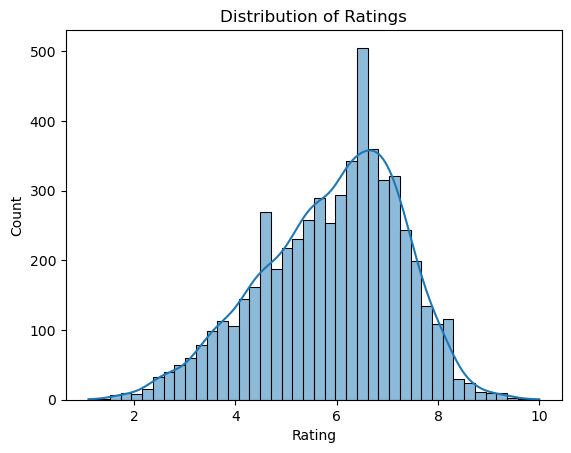

In [14]:
#rating plot
sns.histplot(data=df, x='Rating', kde=True).set_title('Distribution of Ratings')
plt.show()

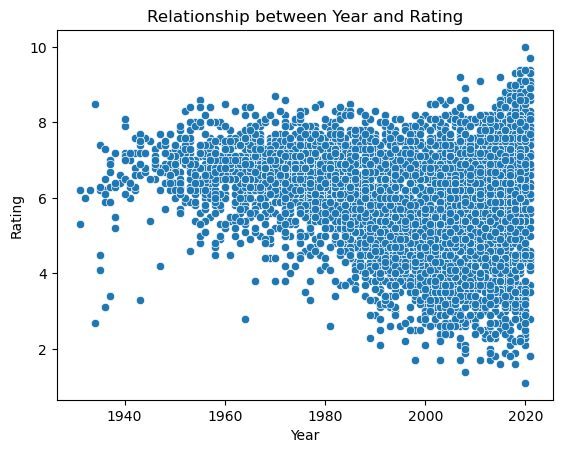

In [15]:
#year vs rating plot
sns.scatterplot(data=df, x='Year', y='Rating')
plt.title("Relationship between Year and Rating")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.show()

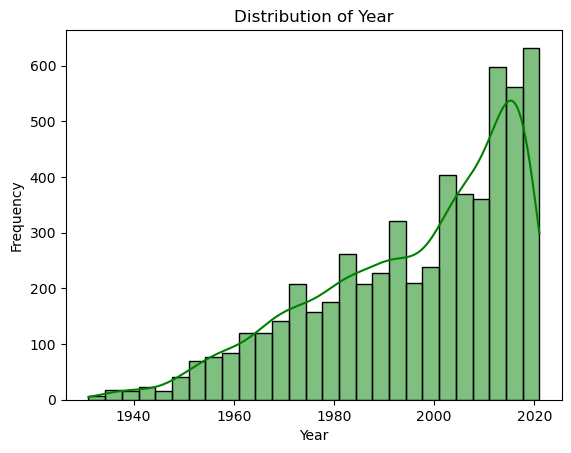

In [16]:
#plot of yearly distribution
sns.histplot(data=df, x='Year', kde=True, color='green')
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

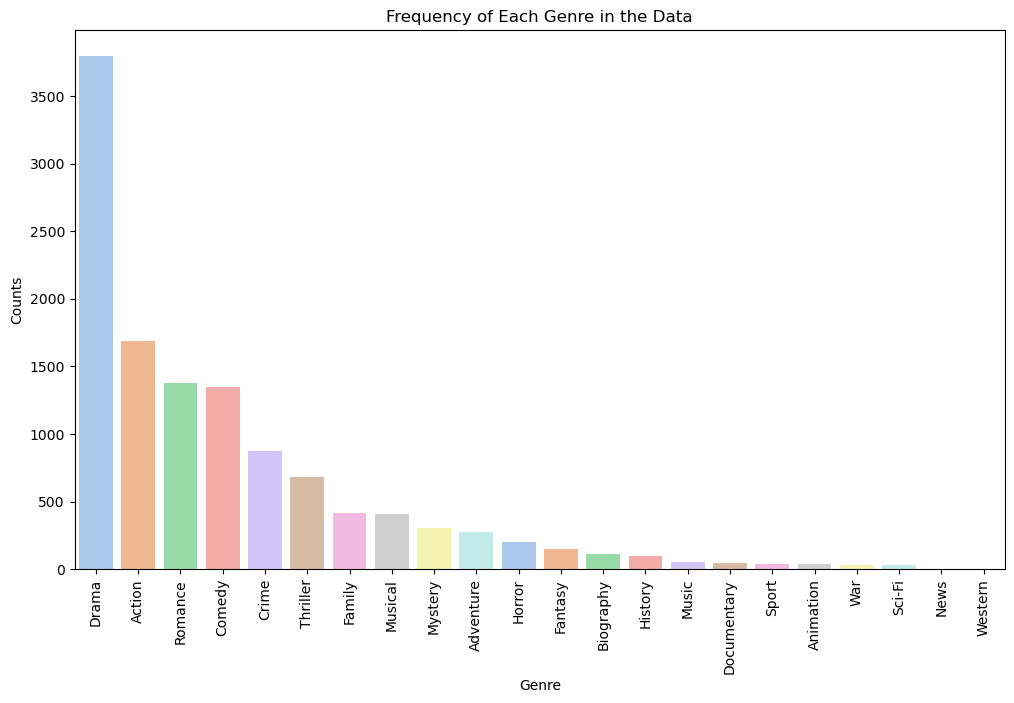

In [17]:
# genre wise count
movies_genre = df['Genre'].str.split(', ', expand=True).stack().value_counts()
labels = movies_genre.index
count = movies_genre.values

plt.figure(figsize=(12,7))
sns.barplot(x=labels, y=count, palette='pastel') 
plt.xticks(rotation=90)
plt.title('Frequency of Each Genre in the Data')
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.show()

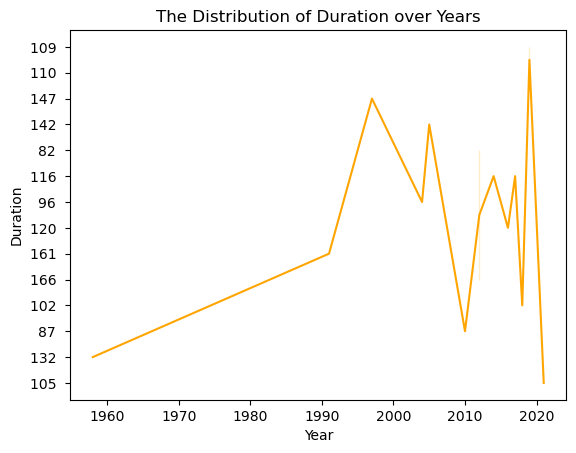

In [18]:
# year vs duration
sns.lineplot(data=df.head(15), x='Year', y='Duration', color='orange') 
plt.title('The Distribution of Duration over Years')
plt.xlabel('Year')
plt.ylabel('Duration')
plt.show()

In [20]:
encoder = LabelEncoder()
df[['Actor 1', 'Actor 2', 'Actor 3', 'Genre', 'Director']] = df[['Actor 1', 'Actor 2', 'Actor 3', 'Genre', 'Director']].apply(lambda x: encoder.fit_transform(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   int64  
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   int64  
 7   Actor 1   5659 non-null   int64  
 8   Actor 2   5659 non-null   int64  
 9   Actor 3   5659 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 615.4+ KB


In [21]:
df2 = df.drop('Name',axis=1)
df2.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,229,7.0,8,629,1352,2272,319
3,2019,110,184,4.4,35,1335,1198,719,2148
5,1997,147,157,4.7,827,1530,378,75,2045
6,2005,142,289,7.4,1086,2044,692,1112,2524
8,2012,82,320,5.6,326,135,1934,1175,1013


In [24]:
X = df2.drop('Rating',axis=1)
y= df2['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[5.63683425 5.84694164 5.93283536 ... 6.02786817 5.89959597 5.36480764]


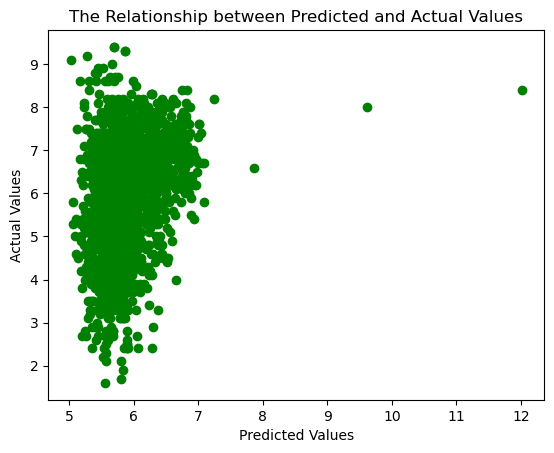

In [26]:
plt.scatter(y_pred, y_test, color='green')  # Change color to green
plt.title("The Relationship between Predicted and Actual Values")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [27]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Squared Error: 1.6737798290839632
Mean Absolute Error: 1.0355603579570467


In [29]:
from sklearn.metrics import r2_score
# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.08633120473998979
